In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test = """
Sensor at x=2, y=18: closest beacon is at x=-2, y=15
Sensor at x=9, y=16: closest beacon is at x=10, y=16
Sensor at x=13, y=2: closest beacon is at x=15, y=3
Sensor at x=12, y=14: closest beacon is at x=10, y=16
Sensor at x=10, y=20: closest beacon is at x=10, y=16
Sensor at x=14, y=17: closest beacon is at x=10, y=16
Sensor at x=8, y=7: closest beacon is at x=2, y=10
Sensor at x=2, y=0: closest beacon is at x=2, y=10
Sensor at x=0, y=11: closest beacon is at x=2, y=10
Sensor at x=20, y=14: closest beacon is at x=25, y=17
Sensor at x=17, y=20: closest beacon is at x=21, y=22
Sensor at x=16, y=7: closest beacon is at x=15, y=3
Sensor at x=14, y=3: closest beacon is at x=15, y=3
Sensor at x=20, y=1: closest beacon is at x=15, y=3
""".strip()

In [3]:
with open('input.txt', 'r') as f:
    input_ = f.read().strip()

# Part 1

In [4]:
def parse_input(input_):
    lines = input_.splitlines()
    sensors = []
    beacons = []
    for line in lines:
        sensor, beacon = line.replace('Sensor at ', '').replace(' closest beacon is at ', '').split(':')
        sensor_pos = tuple(int(x) for x in sensor.replace('x=', '').replace('y=', '').split(','))
        beacon_pos = tuple(int(x) for x in beacon.replace('x=', '').replace('y=', '').split(','))
        sensors.append(sensor_pos)
        beacons.append(beacon_pos)
    return sensors, beacons

In [5]:
def distance(s, b):
    return abs(s[0] - b[0]) + abs(s[1] - b[1])

def distances(sensors, beacons):
    return [distance(s, b) for s, b in zip(sensors, beacons)]

In [77]:
sensors, beacons = parse_input(test)
dist = distances(sensors, beacons)
set_beacons = set(x for x in beacons)
set_sensors = set(x for x in sensors)

x0 = min([s[0] - d for s, d in zip(sensors, dist)])
x1 = max([s[0] + d for s, d in zip(sensors, dist)])

y = 10
l = np.zeros((x1 - x0 + 1,), dtype=int)
xy = np.array([(x, y) for x in range(x0, x1 + 1)])
for s, d in zip(sensors, dist):
    l[np.sum(np.abs(s - xy), axis=1) <= d] = 1

for b in set_beacons:
    if b[1] == y:
        l[b[0] - x0] = 0

for b in set_sensors:
    if b[1] == y:
        l[b[0] - x0] = 0

In [78]:
sensors, beacons = parse_input(input_)
dist = distances(sensors, beacons)
set_beacons = set(x for x in beacons)
set_sensors = set(x for x in sensors)
y = 2_000_000


x0 = min([s[0] - d for s, d in zip(sensors, dist)]) - 5
x1 = max([s[0] + d for s, d in zip(sensors, dist)]) + 5
print(x0, x1)

l = np.zeros((x1 - x0 + 1,), dtype=int)
xy = np.array([(x, y) for x in range(x0, x1 + 1)])
for s, d in zip(sensors, dist):
    l[np.sum(np.abs(s - xy), axis=1) <= d] = 1

for b in set_beacons:
    if b[1] == y:
        l[b[0] - x0] = 0

for b in set_sensors:
    if b[1] == y:
        l[b[0] - x0] = 0

-1634596 5350985


In [79]:
l.sum()

6078701

# Part 2

In [80]:
def get_borders(center, d):
    borders = []
    for i in range(d):
        p = (center[0] + d - i, center[1] + i)
        borders.append(p)
    for i in range(d):
        p = (center[0] - i, center[1] + d - i)
        borders.append(p)
    for i in range(d):
        p = (center[0] - d + i, center[1] - i)
        borders.append(p)
    for i in range(d):
        p = (center[0] + i, center[1] - d + i)
        borders.append(p)
    return np.array(borders)

In [81]:
sensors, beacons = parse_input(test)
dist = distances(sensors, beacons)
sensors = np.array(sensors)
beacons = np.array(beacons)
dist = np.array(dist)

x_max = 20
y_max = 20
x0, x1 = 0, x_max

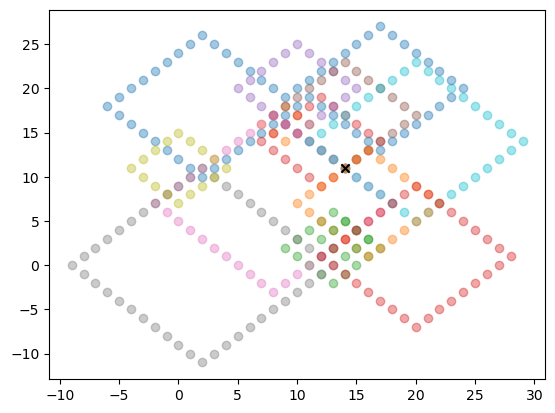

In [83]:
candidates = []
for s, d in zip(sensors, dist):
    borders = get_borders(s, d+1)
    candidates.append(borders[(borders[:,0] >= 0) &(borders[:,0] <= x_max) & (borders[:,1] >= 0) &(borders[:,1] <= y_max)])
    plt.scatter(borders[:,0], borders[:, 1], alpha=0.4)
   
plt.scatter(14, 11, color='k', marker='x')

In [84]:
for c in candidates:
    l = np.zeros((c.shape[0],), dtype=int)
    for s, d in zip(sensors, dist):
        s_to_c = np.abs(s - c).sum(axis=1)
        l[s_to_c <= d] = 1
    if sum(l) < c.shape[0]:
        # found!
        idx = np.where(l == 0)[0][0]
        pos = c[idx]
        break
pos

array([14, 11])

In [85]:
sensors, beacons = parse_input(input_)
dist = distances(sensors, beacons)
sensors = np.array(sensors)
beacons = np.array(beacons)
dist = np.array(dist)

x_max = 4_000_000
y_max = 4_000_000
candidates = []
for s, d in zip(sensors, dist):
    borders = get_borders(s, d+1)
    candidates.append(borders[(borders[:,0] >= 0) &(borders[:,0] <= x_max) & (borders[:,1] >= 0) &(borders[:,1] <= y_max)])


In [86]:
for c in candidates:
    l = np.zeros((c.shape[0],), dtype=int)
    for s, d in zip(sensors, dist):
        s_to_c = np.abs(s - c).sum(axis=1)
        l[s_to_c <= d] = 1
    if sum(l) < c.shape[0]:
        # found!
        idx = np.where(l == 0)[0][0]
        pos = c[idx]
        break
pos

array([3141837, 3400528])

In [87]:
pos[0] * 4000000 + pos[1]

12567351400528